In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data_train = pd.read_csv('train.csv')

In [3]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

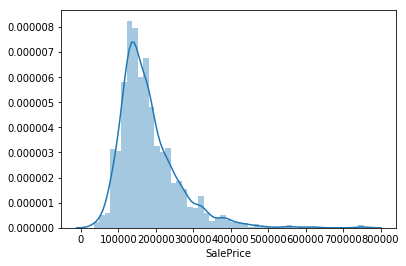

In [5]:
sns.distplot(data_train['SalePrice'])

In [6]:
print("Skewness: %f" % data_train['SalePrice'].skew())
print("Kurtosis: %f" % data_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


(-0.5, 1.5, 0, 791005.0)

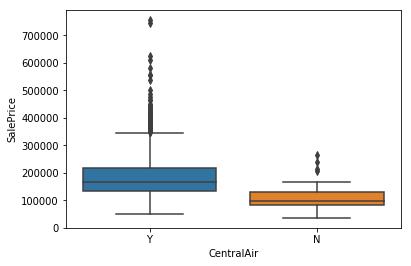

In [7]:
var = 'CentralAir'
data=pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
fig=sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,yman=800000)

(-0.5, 9.5, 0, 800000)

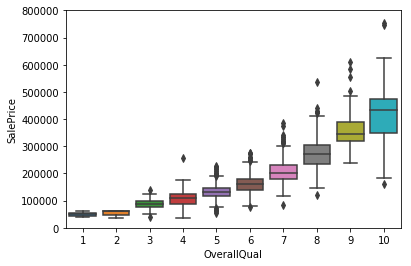

In [8]:
var = 'OverallQual'
data=pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
fig=sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)

(-0.5, 111.5, 0, 800000)

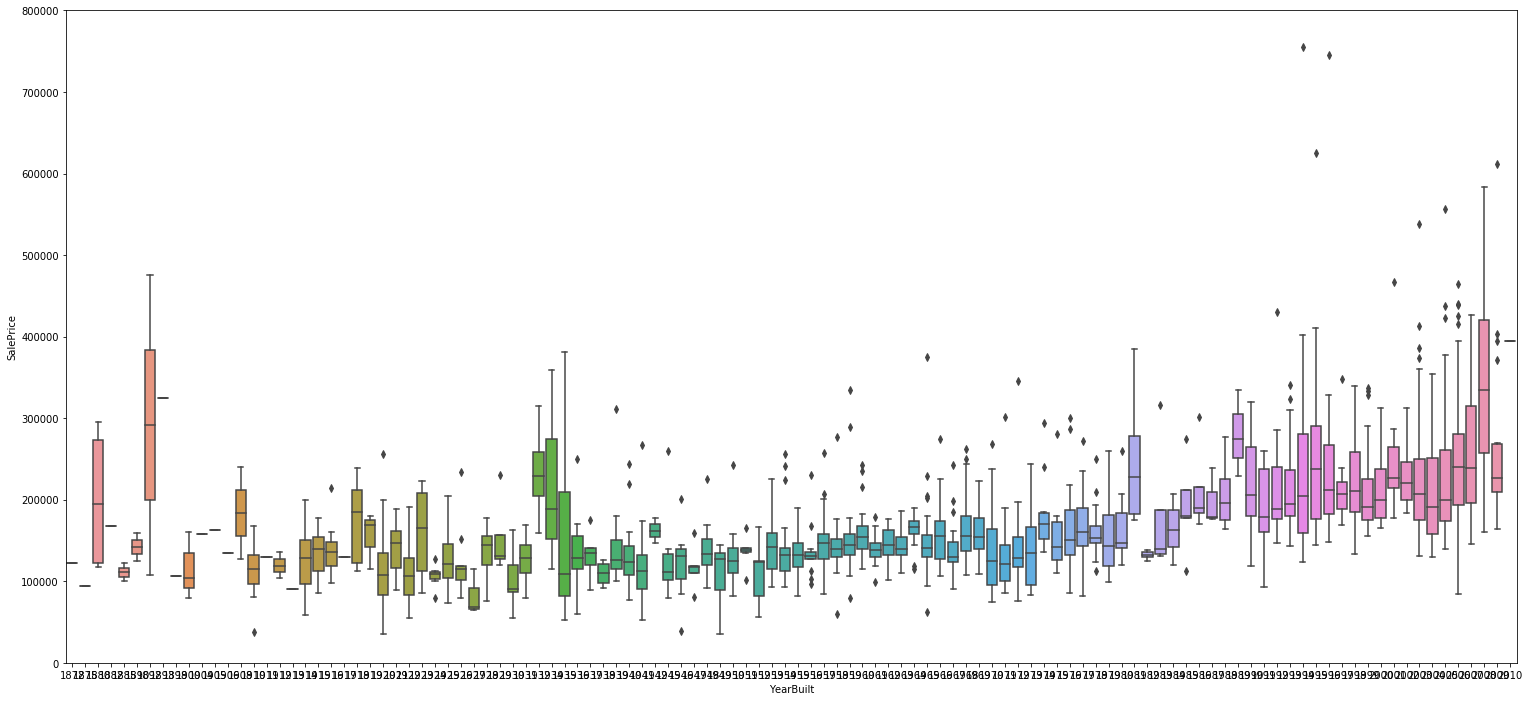

In [9]:
var = 'YearBuilt'
data=pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
f,ax=plt.subplots(figsize=(26,12))
fig=sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)

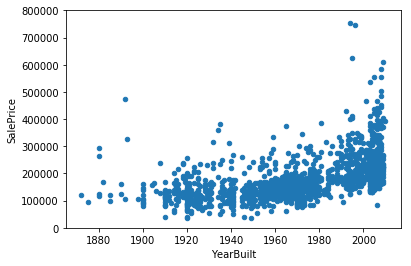

In [10]:
var = 'YearBuilt'
data=pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

,SalePrice,Neighborhood
0,208500,CollgCr
1,181500,Veenker
2,223500,CollgCr
3,140000,Crawfor
4,250000,NoRidge
5,143000,Mitchel
6,307000,Somerst
7,200000,NWAmes
8,129900,OldTown
9,118000,BrkSide


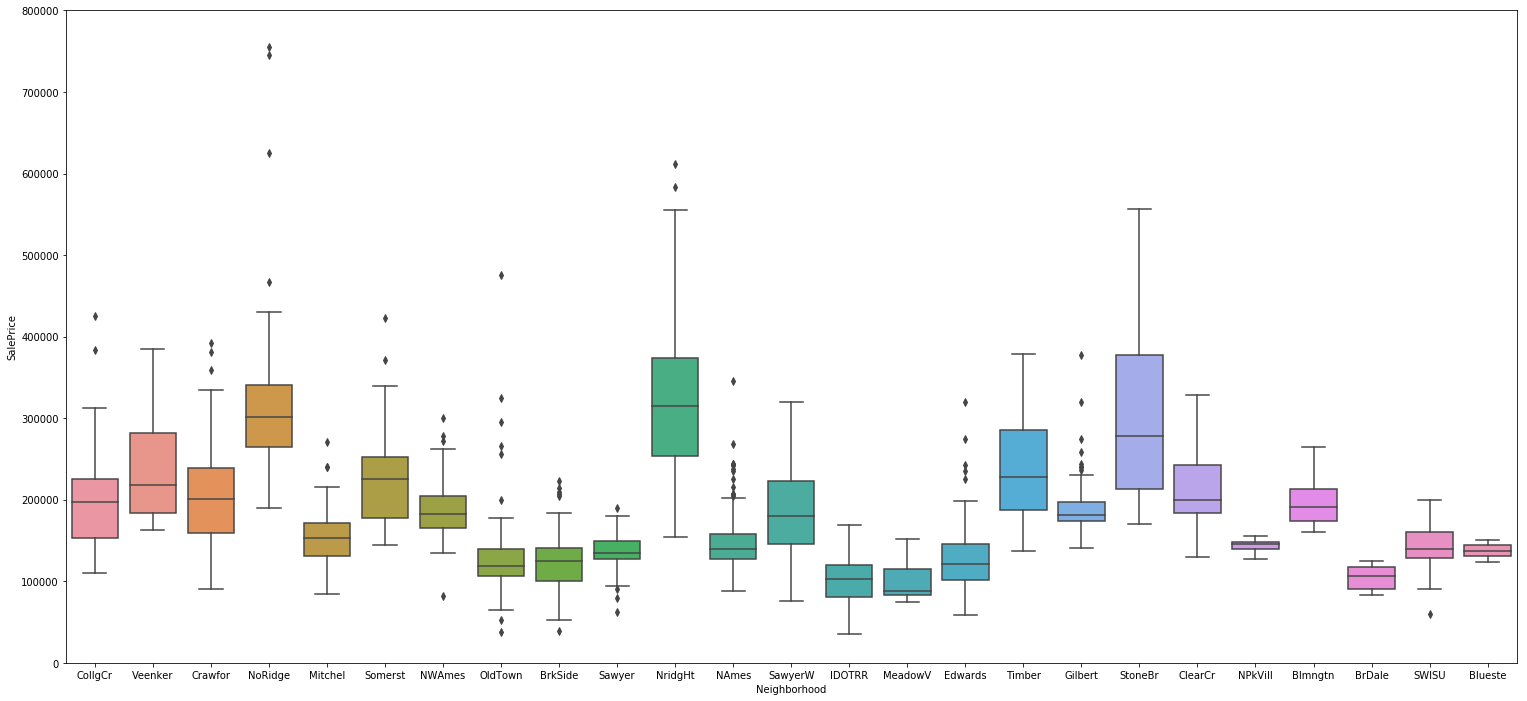

In [13]:
var = 'Neighborhood'
data=pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
f,ax=plt.subplots(figsize=(26,12))
fig=sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)
data

In [14]:
location=[]
for x in data['Neighborhood']:
    if x not in location:
        location.append(x)
new_data=data.sort_values(by=['SalePrice'],ascending=False)
new_data

,SalePrice,Neighborhood
691,755000,NoRidge
1182,745000,NoRidge
1169,625000,NoRidge
898,611657,NridgHt
803,582933,NridgHt
1046,556581,StoneBr
440,555000,NridgHt
769,538000,StoneBr
178,501837,StoneBr
798,485000,NridgHt


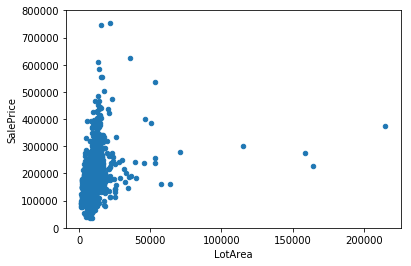

In [15]:
var = 'LotArea'
data=pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

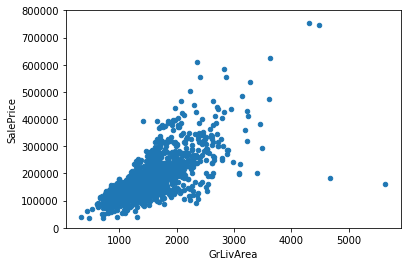

In [16]:
var = 'GrLivArea'
data=pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

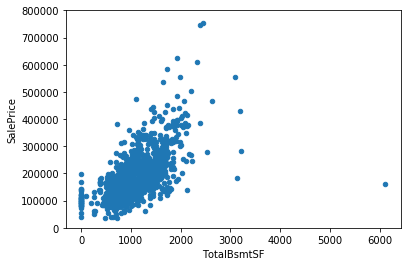

In [17]:
var = 'TotalBsmtSF'
data=pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

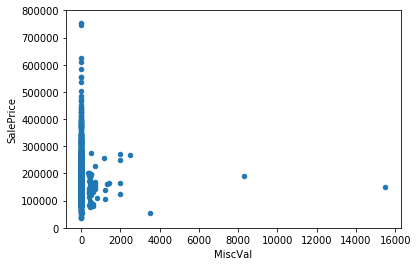

In [18]:
var = 'MiscVal'
data=pd.concat([data_train['SalePrice'],data_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

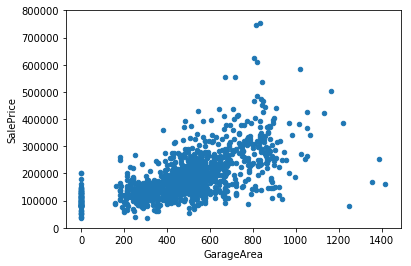

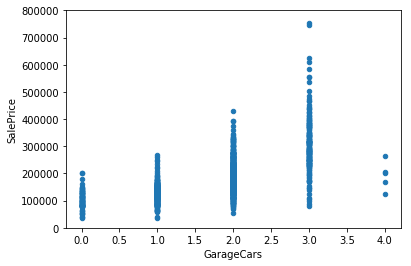

In [20]:
var=['GarageArea','GarageCars']
for index in range(2):
    data=pd.concat([data_train['SalePrice'],data_train[var[index]]],axis=1)
    data.plot.scatter(x=var[index],y='SalePrice',ylim=(0,800000))

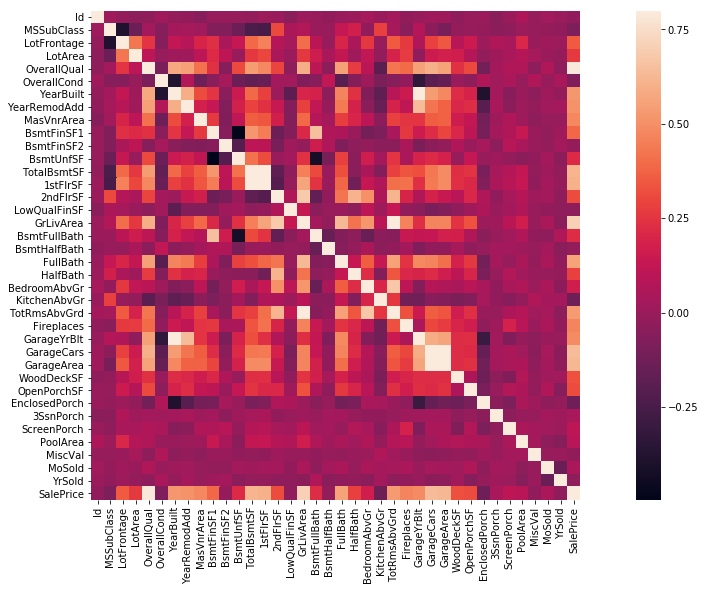

In [21]:
corr=data_train.corr()
f,ax=plt.subplots(figsize=(20,9))
sns.heatmap(corr,vmax=0.8,square=True)

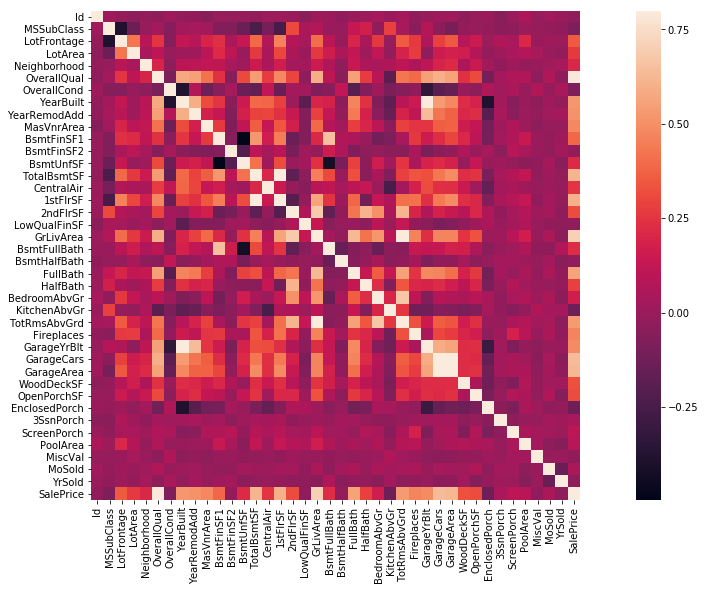

In [23]:
from sklearn import preprocessing
f_names=['CentralAir','Neighborhood']
for x in f_names:
    label=preprocessing.LabelEncoder()
    data_train[x]=label.fit_transform(data_train[x])
corr=data_train.corr()
f,ax=plt.subplots(figsize=(20,9))
sns.heatmap(corr,vmax=0.8,square=True)

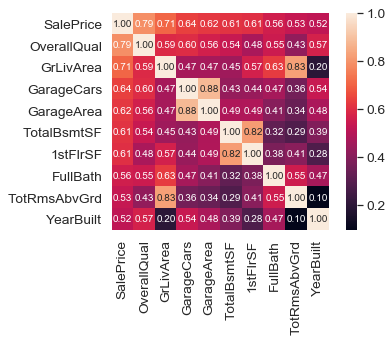

In [29]:
k=10
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

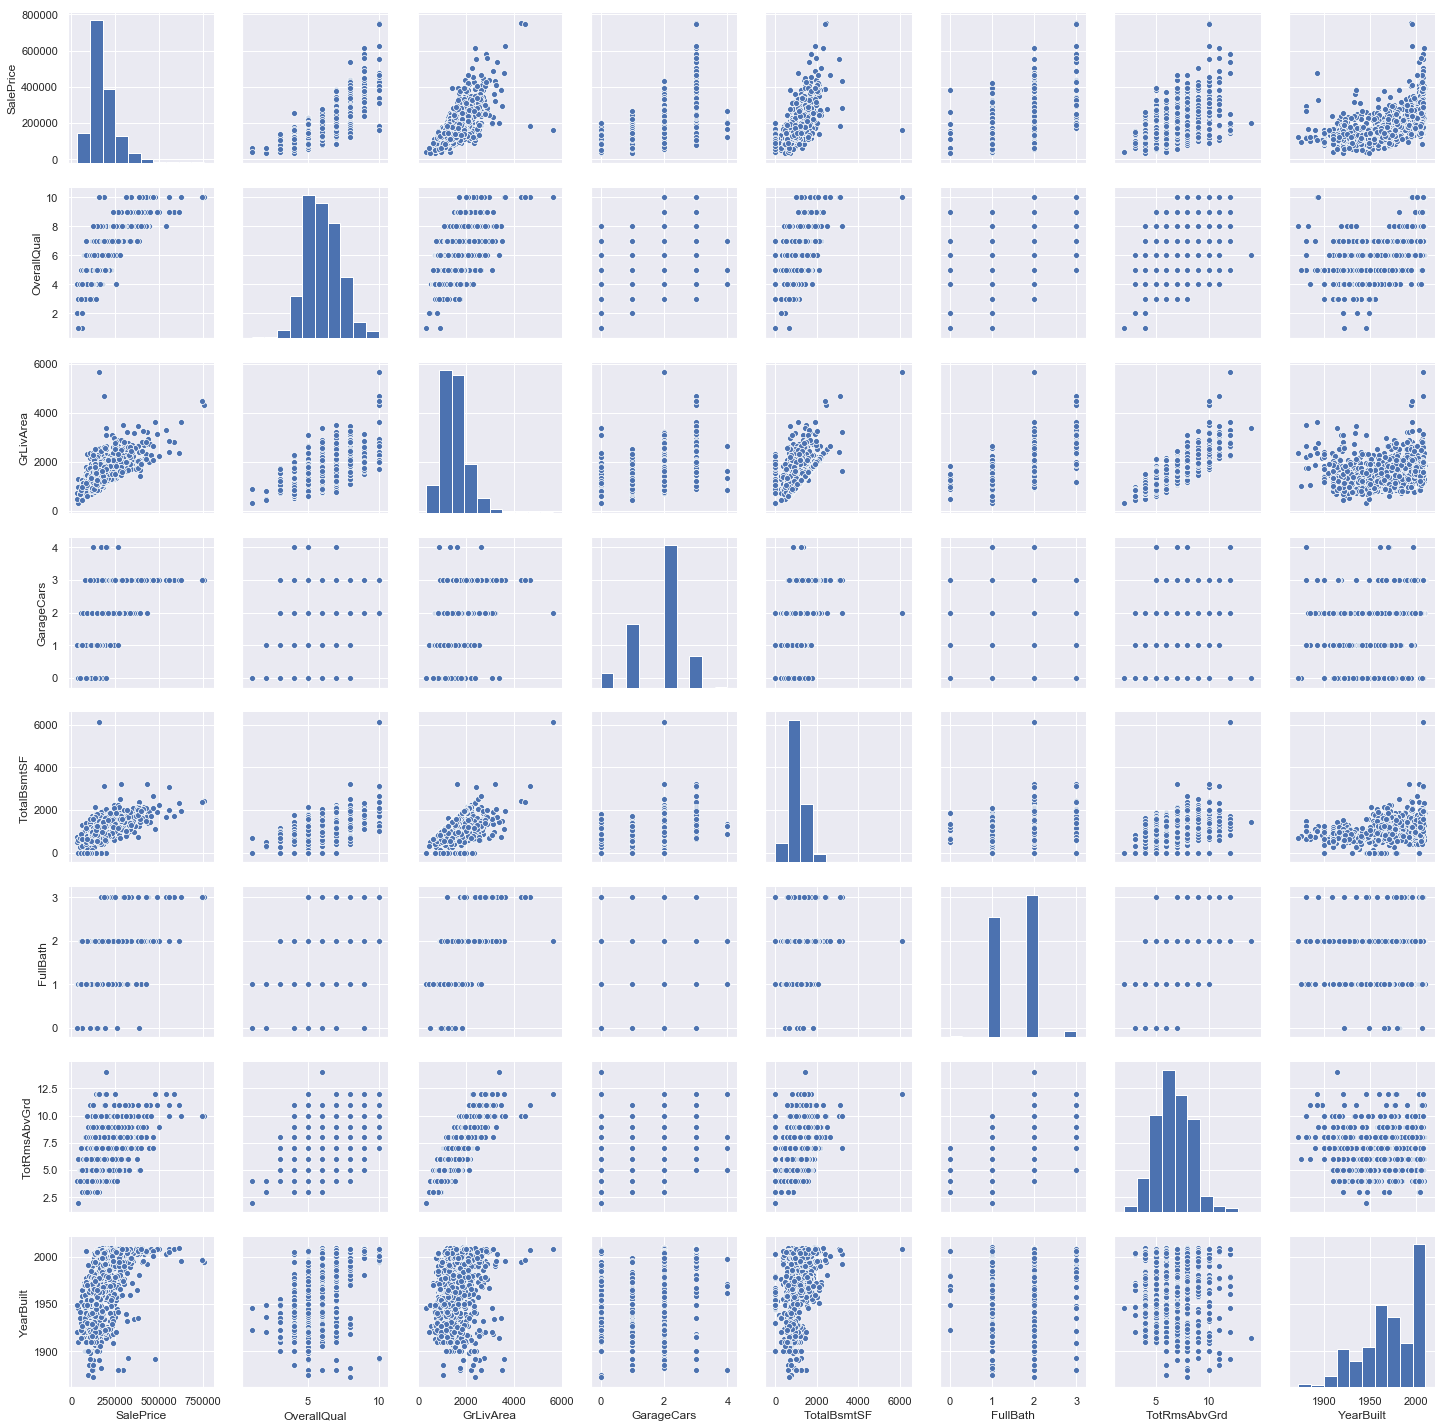

In [30]:
sns.set()
cols = ['SalePrice','OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.pairplot(data_train[cols], size = 2.5)
plt.show()

In [33]:
from sklearn import linear_model,svm,gaussian_process
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [37]:
cols = ['OverallQual','GrLivArea', 'GarageCars','TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
x = data_train[cols].values
y = data_train['SalePrice'].values
x_scaled = preprocessing.StandardScaler().fit_transform(x)
y_scaled = preprocessing.StandardScaler().fit_transform(y.reshape(-1,1))
X_train,X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.30, random_state=42)

In [39]:
clfs={
        'svm':svm.SVR(),
        'RandomForestRegressor':RandomForestRegressor(n_estimators=400),
        'BayesianRidge':linear_model.BayesianRidge()
}
for clf in clfs:
    try:
        clfs[clf].fit(X_train,y_train)
        y_pred=clfs[clf].predict(X_test)
        print(clf+'cost:'+str(np.sum(y_pred-y_test)/len(y_pred)))
    except Exception as e:
        print(clf+'Error:')
        print(str(e))

svmcost:-17.470080290263795
RandomForestRegressorcost:-4.1469376617509255
BayesianRidgecost:-19.114642617067314


In [47]:
rfr=clfs['RandomForestRegressor']

In [48]:
data_test=pd.read_csv('test.csv')

In [49]:
data_test[cols].isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      1
TotalBsmtSF     1
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
dtype: int64

In [50]:
data_test['GarageCars'].describe()

count    1458.000000
mean        1.766118
std         0.775945
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64

In [51]:
data_test['TotalBsmtSF'].describe()

count    1458.000000
mean     1046.117970
std       442.898624
min         0.000000
25%       784.000000
50%       988.000000
75%      1305.000000
max      5095.000000
Name: TotalBsmtSF, dtype: float64

In [52]:
cols2 = ['OverallQual','GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
cars = data_test['GarageCars'].fillna(1.766118)
bsmt = data_test['TotalBsmtSF'].fillna(1046.117970)
data_test_x = pd.concat( [data_test[cols2], cars, bsmt] ,axis=1)
data_test_x.isnull().sum()

OverallQual     0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
GarageCars      0
TotalBsmtSF     0
dtype: int64

In [53]:
x = data_test_x.values
y_te_pred = rfr.predict(x)
print(y_te_pred)

print(y_te_pred.shape)
print(x.shape)

[2.79305668 2.79305668 2.76523043 ... 2.76523043 2.78898514 2.0571293 ]
(1459,)
(1459, 7)


In [54]:
data_test_x

,OverallQual,GrLivArea,FullBath,TotRmsAbvGrd,YearBuilt,GarageCars,TotalBsmtSF
0,5,896,1,5,1961,1.0,882.0
1,6,1329,1,6,1958,1.0,1329.0
2,5,1629,2,6,1997,2.0,928.0
3,6,1604,2,7,1998,2.0,926.0
4,8,1280,2,5,1992,2.0,1280.0
5,6,1655,2,7,1993,2.0,763.0
6,6,1187,2,6,1992,2.0,1168.0
7,6,1465,2,7,1998,2.0,789.0
8,7,1341,1,5,1990,2.0,1300.0
9,4,882,1,4,1970,2.0,882.0


In [55]:
prediction = pd.DataFrame(y_te_pred, columns=['SalePrice'])
result = pd.concat([ data_test['Id'], prediction], axis=1)
# result = result.drop(resultlt.columns[0], 1)
result.columns

Index(['Id', 'SalePrice'], dtype='object')

In [56]:
result.to_csv('./Predictions.csv', index=False)